In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [75]:
df = pd.read_csv("Titanic-Dataset.csv")
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


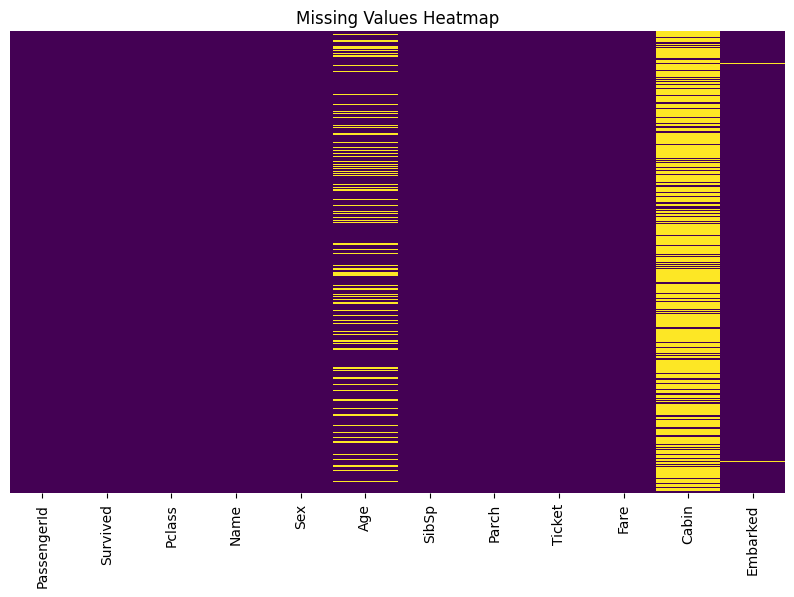

In [76]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False, cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [77]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)

In [78]:
print(f"Columns before creating dummies: {df.columns.tolist()}")

Columns before creating dummies: ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


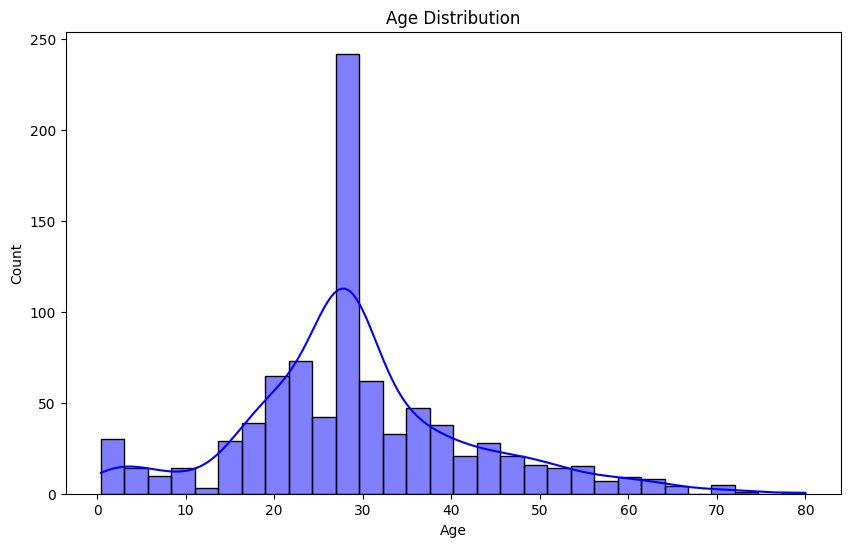

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

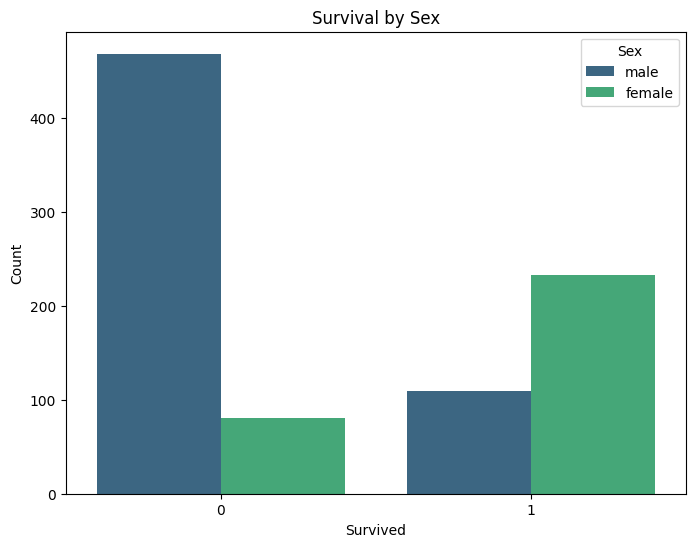

In [80]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=df, palette='viridis')
plt.title('Survival by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')
plt.show()

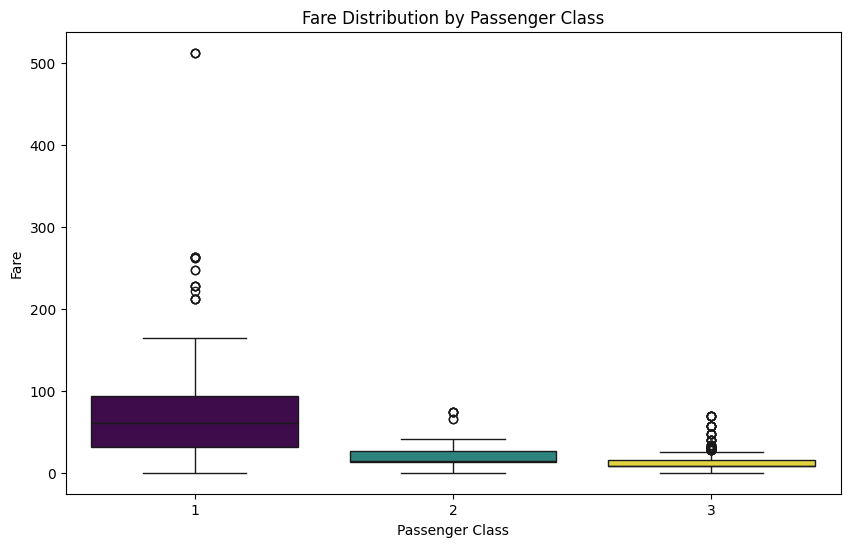

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df, hue='Pclass', palette='viridis', dodge=False, legend=False)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

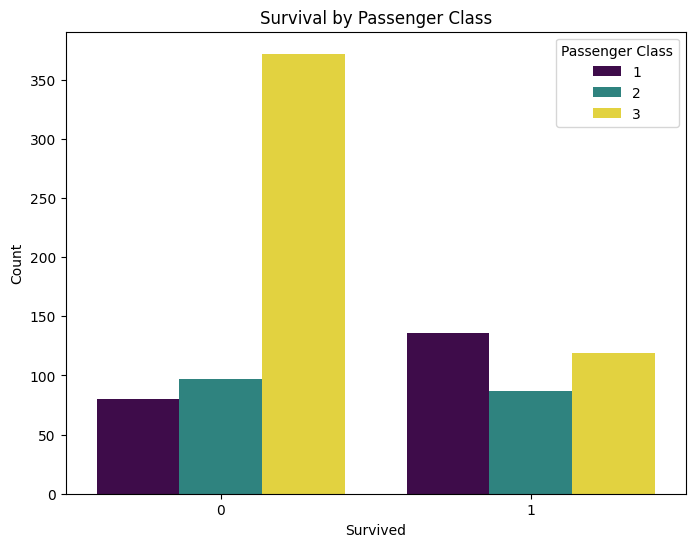

In [82]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Pclass', data=df, palette='viridis')
plt.title('Survival by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Passenger Class', loc='upper right')
plt.show()

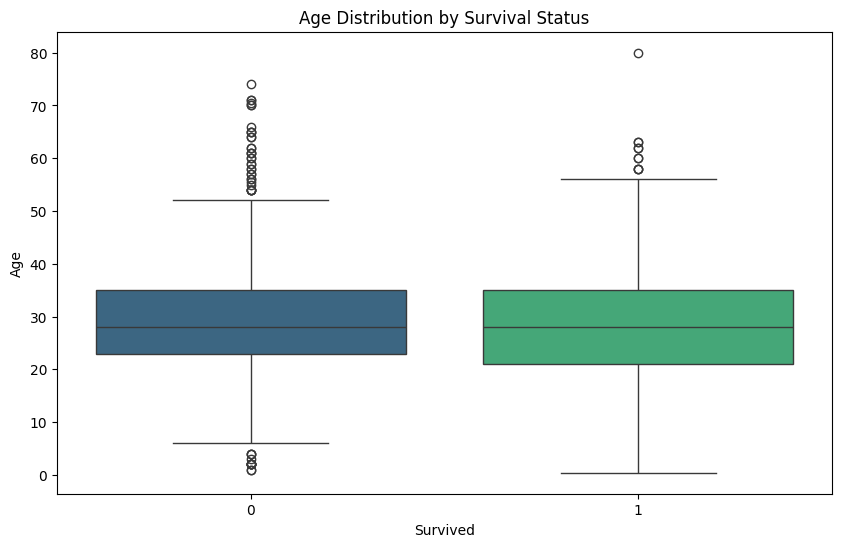

In [83]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df, hue='Survived', palette='viridis', dodge=False, legend=False)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

<Figure size 1000x1000 with 0 Axes>

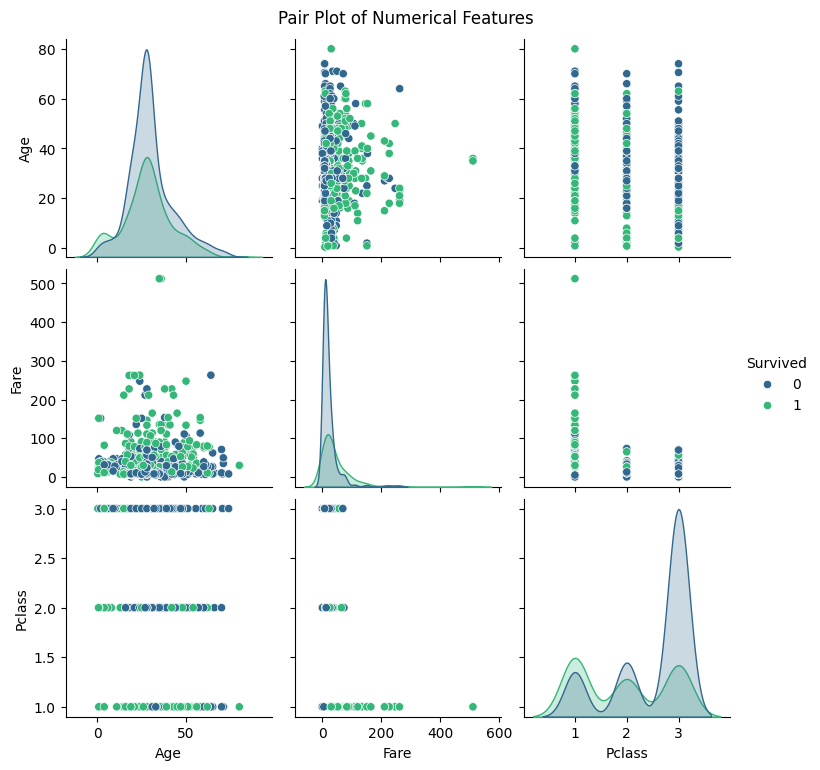

In [84]:
plt.figure(figsize=(10, 10))
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', palette='viridis')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

In [85]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [86]:
if 'Embarked' in df.columns:
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
else:
    print("Error: 'Embarked' column not found in DataFrame.")
    
print(f"Columns after creating dummies: {df.columns.tolist()}")

Columns after creating dummies: ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']


In [87]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [88]:
print(f"Missing values in features:\n{X.isnull().sum()}")
print(f"Missing values in target:\n{y.isnull().sum()}")

Missing values in features:
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64
Missing values in target:
0


In [89]:
print(f"Data types of features:\n{X.dtypes}")

Data types of features:
PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked_Q        bool
Embarked_S        bool
dtype: object


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (712, 9), X_test shape: (179, 9)
y_train shape: (712,), y_test shape: (179,)


In [92]:
print(f"Sample X_train:\n{X_train.head()}")
print(f"Sample y_train:\n{y_train.head()}")

Sample X_train:
     PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  \
331          332       1    0  45.5      0      0  28.5000       False   
733          734       2    0  23.0      0      0  13.0000       False   
382          383       3    0  32.0      0      0   7.9250       False   
704          705       3    0  26.0      1      0   7.8542       False   
813          814       3    1   6.0      4      2  31.2750       False   

     Embarked_S  
331        True  
733        True  
382        True  
704        True  
813        True  
Sample y_train:
331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64


In [93]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [94]:
try:
    model.fit(X_train, y_train)
    print("Model fitting completed successfully.")
except ValueError as e:
    print(f"Error during model fitting: {e}")

Model fitting completed successfully.


In [95]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       105
           1       0.84      0.76      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

[[94 11]
 [18 56]]
